# ICE-4 Text Data: Flattening, Filtering, and Chunking

# GitHub Link:
#### https://github.com/nehabaddam/Feature_Engineering

## (Tutorial) Bag of X
Following is a sample of applying bag of n-grams to Yelp academic dataset review, please download it with following link:

https://github.com/knowitall/yelp-dataset-challenge/blob/master/data/yelp_phoenix_academic_dataset/yelp_academic_dataset_review.json

In [1]:
import pandas as pd
import json

In [2]:
f = open('yelp_academic_dataset_review.json')
js = []
for i in range(10000):
    js.append(json.loads(f.readline()))
f.close()
review_df = pd.DataFrame(js)
review_df.shape

(10000, 8)

In [3]:
review_df.head()

,votes,user_id,review_id,stars,date,text,type,business_id
0,"{'funny': 0, 'useful': 5, 'cool': 2}",rLtl8ZkDX5vH5nAx9C3q5Q,fWKvX83p0-ka4JS3dc6E5A,5,2011-01-26,My wife took me here on my birthday for breakf...,review,9yKzy9PApeiPPOUJEtnvkg
1,"{'funny': 0, 'useful': 0, 'cool': 0}",0a2KyEL0d3Yb1V6aivbIuQ,IjZ33sJrzXqU-0X6U8NwyA,5,2011-07-27,I have no idea why some people give bad review...,review,ZRJwVLyzEJq1VAihDhYiow
2,"{'funny': 0, 'useful': 1, 'cool': 0}",0hT2KtfLiobPvh6cDC8JQg,IESLBzqUCLdSzSqm0eCSxQ,4,2012-06-14,love the gyro plate. Rice is so good and I als...,review,6oRAC4uyJCsJl1X0WZpVSA
3,"{'funny': 0, 'useful': 2, 'cool': 1}",uZetl9T0NcROGOyFfughhg,G-WvGaISbqqaMHlNnByodA,5,2010-05-27,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,_1QQZuf4zZOyFCvXc0o6Vg
4,"{'funny': 0, 'useful': 0, 'cool': 0}",vYmM4KTsC8ZfQBg-j5MWkw,1uJFq2r5QfJG_6ExMRCaGw,5,2012-01-05,General Manager Scott Petello is a good egg!!!...,review,6ozycU1RpktNG2-1BroVtw


note: in the default settings of CountVectorizer, the token_pattern = '(?u)\b\w\w+\b', which ignores single-character words. Whe employ the token_pattern = '(?u)\b\w+\b' to include the single-character words.

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
bow_converter = CountVectorizer(token_pattern='(?u)\\b\\w+\\b')
x = bow_converter.fit_transform(review_df['text'])

In [5]:
unigram = bow_converter.get_feature_names_out()

In [6]:
bigram_converter = CountVectorizer(ngram_range=(2,2), token_pattern='(?u)\\b\\w+\\b')
x2 = bigram_converter.fit_transform(review_df['text'])

In [7]:
bigram = bigram_converter.get_feature_names_out()

In [8]:
trigram_converter = CountVectorizer(ngram_range=(3,3), token_pattern='(?u)\\b\\w+\\b')
x3 = trigram_converter.fit_transform(review_df['text'])

In [9]:
trigram = trigram_converter.get_feature_names_out()

In [10]:
unigram

array(['0', '00', '000', ..., 'école', 'ém', 'òc'], dtype=object)

In [11]:
bigram

array(['0 0', '0 20', '0 39', ..., 'école lenôtre', 'ém all', 'òc châm'],
      dtype=object)

In [12]:
trigram

array(['0 0 eye', '0 20 less', '0 39 oz', ..., 'école lenôtre trained',
       'ém all they', 'òc châm a'], dtype=object)

In [13]:
print (len(unigram), len(bigram), len(trigram))

29222 368943 881620


<IPython.core.display.Javascript object>


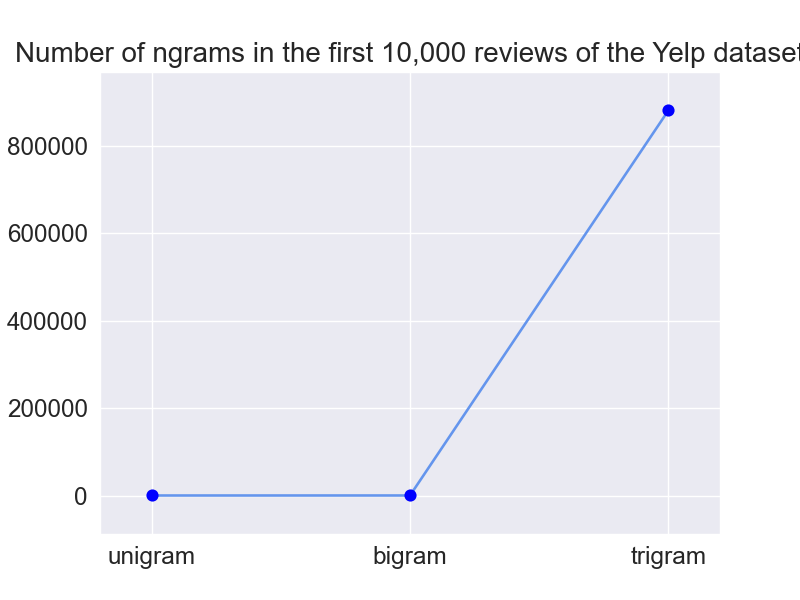

In [17]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
counts = [len(unigram), len(bigram), len(trigram)]
plt.plot(counts, color='cornflowerblue')
plt.plot(counts, 'bo')
plt.margins(0.1)
plt.xticks(range(3), ['unigram', 'bigram', 'trigram'])
plt.tick_params(labelsize=14)
plt.title('Number of ngrams in the first 10,000 reviews of the Yelp dataset', {'fontsize':16})
plt.show()

## Task 1. 1 Applying the unigram, bigram, and trigram tokenization methods to the given text below.

In [18]:
train_text = """My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.
Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.
I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.
It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.
It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!"""

# write your code here

#import the libraries
from sklearn.feature_extraction.text import CountVectorizer

#Countvectorizer object
bow_converter = CountVectorizer(token_pattern='(?u)\\b\\w+\\b')

x = bow_converter.fit_transform([train_text])

# Applying the unigram, bigram, and trigram tokenization methods to the given text below.

#Creating unigrams
unigram = bow_converter.get_feature_names_out()
unigram


array(['2', 'a', 'absolute', 'absolutely', 'amazing', 'an', 'and',
       'anyway', 'arrived', 'back', 'best', 'better', 'birthday', 'blend',
       'bloody', 'bread', 'breakfast', 'busy', 'came', 'can', 'complete',
       'delicious', 'do', 'earlier', 'eggs', 'ever', 'everything',
       'excellent', 'favor', 'fills', 'food', 'for', 'fresh', 'from',
       'garden', 'get', 'go', 'griddled', 'grounds', 'had', 'here', 'i',
       'ingredients', 'it', 'like', 'looked', 'looks', 'm', 'made',
       'mary', 'me', 'meal', 'menu', 'morning', 'my', 'of', 'on', 'only',
       'order', 'our', 'outside', 'overlooking', 'perfect', 'phenomenal',
       'pieces', 'place', 'pleasure', 'pretty', 'quickly', 'saturday',
       'scrambled', 'semi', 'simply', 'sitting', 'skillet', 'so', 'sure',
       't', 'tasty', 'the', 'their', 'them', 'they', 'to', 'toast',
       'took', 'truffle', 'up', 'use', 've', 'vegetable', 'wait',
       'waitress', 'was', 'weather', 'when', 'which', 'while', 'white',
       

In [19]:
#Creating bigrams
bigram_converter = CountVectorizer(ngram_range=(2,2), token_pattern='(?u)\\b\\w+\\b')
x2 = bigram_converter.fit_transform([train_text])
bigram = bigram_converter.get_feature_names_out()
bigram


array(['2 pieces', 'a favor', 'absolute pleasure', 'absolutely made',
       'amazing and', 'amazing while', 'an absolute', 'and blend',
       'and delicious', 'and get', 'and it', 'and our', 'and simply',
       'anyway i', 'arrived quickly', 'best i', 'best toast', 'better do',
       'birthday for', 'blend them', 'bloody mary', 'bread with',
       'breakfast and', 'busy saturday', 'came with', 'can t',
       'complete it', 'delicious it', 'do yourself', 'earlier you',
       'eggs vegetable', 'ever had', 'everything on', 'excellent and',
       'excellent i', 'excellent the', 'favor and', 'fills up',
       'food arrived', 'for breakfast', 'fresh when', 'from their',
       'garden and', 'get here', 'get their', 'go back', 'griddled bread',
       'grounds an', 'had anyway', 'had i', 'had the', 'here on',
       'here the', 'i can', 'i had', 'i m', 'i ve', 'ingredients from',
       'it absolutely', 'it came', 'it it', 'it looked', 'it was',
       'like the', 'looked like', 'loo

In [20]:
#creating trigrams
trigram_converter = CountVectorizer(ngram_range=(3,3), token_pattern='(?u)\\b\\w+\\b')
x3 = trigram_converter.fit_transform([train_text])
trigram = trigram_converter.get_feature_names_out()
trigram

array(['2 pieces of', 'a favor and', 'absolute pleasure our',
       'absolutely made the', 'amazing and it',
       'amazing while everything', 'an absolute pleasure',
       'and blend them', 'and delicious it', 'and get their',
       'and it absolutely', 'and it was', 'and our food',
       'and simply the', 'anyway i can', 'arrived quickly on',
       'best i ve', 'best toast i', 'better do yourself',
       'birthday for breakfast', 'blend them fresh', 'bloody mary it',
       'bread with was', 'breakfast and it', 'busy saturday morning',
       'came with 2', 'can t wait', 'complete it was',
       'delicious it came', 'do yourself a', 'earlier you get',
       'eggs vegetable skillet', 'ever had anyway', 'ever had i',
       'everything on the', 'excellent and our', 'excellent i had',
       'excellent the weather', 'favor and get', 'fills up pretty',
       'food arrived quickly', 'for breakfast and', 'fresh when you',
       'from their garden', 'garden and blend', 'get here 

## Task 1.2 Create your own naive tokenization method (whitespace-based), and apply it to the text given in the task 1.1
note: 1. do not use the existing togkenization methods given by NLP; 2. split the words by whitespace character, the output is more likely as the unigram; 3. no repeating elements in the output.

In [21]:
# write you code here

# naive tokenization method (whitespace-based)
# split the words based on white space
#1. do not use the existing togkenization methods given by NLP
train_text_whitespace = train_text.replace('\n','')
# getting unique unigrams
train_text_whitespace = list(set(train_text_whitespace.split(' ')))
# removing space
train_text_whitespace.remove('')

# printing the output without repetation of words
train_text_whitespace

['so',
 'when',
 'go',
 'it.',
 'complete.It',
 'an',
 'came',
 'My',
 'vegetable',
 'me',
 'to',
 'for',
 'wait',
 'yourself',
 'and',
 'their',
 'here',
 'tasty',
 'white',
 'only',
 'sitting',
 'place',
 'fills',
 'skillet',
 'excellent',
 'waitress',
 'amazing',
 'favor',
 'delicious.It',
 'up',
 'earlier',
 'perfect',
 'weather',
 'food',
 'took',
 'pieces',
 'bread',
 'garden',
 'amazing.While',
 'pretty',
 'EVERYTHING',
 "I've",
 'menu',
 'excellent,',
 'ever',
 'sure',
 'ingredients',
 'scrambled',
 'excellent.',
 'the',
 'them',
 'Mary.',
 'it',
 'outside',
 'blend',
 'absolute',
 'they',
 'grounds',
 'quickly',
 'use',
 'get',
 "had.I'm",
 'I',
 'truffle',
 'The',
 'semi-busy',
 'looked',
 'simply',
 'a',
 'from',
 'made',
 'back!',
 'eggs',
 'had.Anyway,',
 'It',
 'like',
 'was',
 'morning.',
 'with',
 'meal',
 'pleasure.Our',
 'looks',
 'of',
 'birthday',
 'which',
 'phenomenal',
 'Bloody',
 'best',
 'fresh',
 'my',
 'order',
 'better.Do',
 '"toast"',
 'griddled',
 'you',
 

## **Question 1**. Given a sentence "He likes cat". In unigram representation, it could be "He", "likes", "cat". In bigram representation, it could be "He likes", "likes cat". In trigram representation, it could be "He likes cat". Explain why the storage and computation cost increase with the growth of n in n-gram methods.

Answer to Q1: type your answer here:

In N-gram language models the n represents the number of consecutive words or tokens evaluated as a unit.

By evaluating the frequency of these n-length sequences in a text corpus, the N-gram representation captures features of language.

When the value of 'n' in N-gram models increases, so does the storage and computing needs that in turn increase the cost. Because of the larger vocabulary size, increased memory requirements, higher computational complexity, and data sparsity difficulties, the storage and computation costs of N-gram techniques rise as 'n' value incraeses.




---

## (Tutorial) Stemming and Lemmatization

In [22]:
# import PorterStemmer class form nltk.stem.porter module
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

stem = stemmer.stem('flowers')
print(f"'flowers' after stemming: {stem}")

stem = stemmer.stem('zeroes')
print(f"'zeroes' after stemming: {stem}")

stem = stemmer.stem('better')
print(f"'better' after stemming: {stem}")

stem = stemmer.stem('sixties')
print(f"'sixties' after stemming: {stem}")

stem = stemmer.stem('goes')
print(f"'goes' after stemming: {stem}")

stem = stemmer.stem('go')
print(f"'go' after stemming: {stem}")

'flowers' after stemming: flower
'zeroes' after stemming: zero
'better' after stemming: better
'sixties' after stemming: sixti
'goes' after stemming: goe
'go' after stemming: go


In [23]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\badda\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [24]:
# import lemmatizer class from nltk.stem module
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

lemma = lemmatizer.lemmatize('flowers')
print(f"'flowers' after lemmatization: {lemma}")

lemma = lemmatizer.lemmatize('zeros')
print(f"'zeros' after lemmatization: {lemma}")

lemma = lemmatizer.lemmatize('better')
print(f"'better' after lemmatization: {lemma}")

lemma = lemmatizer.lemmatize('sixties')
print(f"'sixties' after lemmatization: {lemma}")

lemma = lemmatizer.lemmatize('goes')
print(f"'goes' after lemmatization: {lemma}")

lemma = lemmatizer.lemmatize('go')
print(f"'go' after lemmatization: {lemma}")

print("\n\n")
lemma = lemmatizer.lemmatize('better', pos='a')   # 'a' denoted ADJECTIVE part-of-speech
print(f"'better' (as an adjective) after lemmatization: {lemma}")

'flowers' after lemmatization: flower
'zeros' after lemmatization: zero
'better' after lemmatization: better
'sixties' after lemmatization: sixty
'goes' after lemmatization: go
'go' after lemmatization: go



'better' (as an adjective) after lemmatization: good


## Task 2. Text filtering for cleaner feature
1. clean the text used in the task 1; 2. remove all punctuations; 3. convert all characters to their lowercase; 4. remove all words in "stopwords"; 5. remove all relatively meaningless words like " 've ", " 's ", etc. 6. after finishing the above operations, apply stemming and lemmatization to the cleaned text respectively.

In [25]:
# write your code here

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\badda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\badda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\badda\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [26]:
# write your code here
# importing libraries
import re
from nltk.corpus import stopwords


words = set(nltk.corpus.words.words())

train_text_filtered = train_text
# removing all the punctuations
train_text_filtered = re.sub(r'[^\w\s]','',train_text_filtered)

#converting all characters to lowercase
train_text_filtered = train_text_filtered.lower()

#removing the stopwords
train_text_filtered = ' '.join([word for word in train_text_filtered.split() if word not in stopwords.words("english")])

# removing possesive pronouns
train_text_filtered = train_text_filtered.replace("'s", "")
train_text_filtered = train_text_filtered.replace("'ve", "")

# removing meaningless words
train_text_filtered = " ".join(w for w in nltk.wordpunct_tokenize(train_text_filtered) if w.lower() in words or not w.isalpha())

# stemming sentence
stemmed_sentence = ' '.join(stemmer.stem(token) for token in nltk.word_tokenize(train_text_filtered))
print(stemmed_sentence)

print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
# lemmatizing sentence
lematizing_sentence = ' '.join(lemmatizer.lemmatize(token) for token in nltk.word_tokenize(train_text_filtered))
print(lematizing_sentence)

wife took birthday breakfast excel weather perfect made sit outsid ground absolut pleasur waitress excel food quickli morn like place pretti quickli get better favor get bloodi mari phenomen simpli best ever pretti sure use garden blend fresh order amaz everyth menu excel white truffl veget skillet tasti delici came 2 bread amaz absolut made meal complet best toast ever anyway cant wait go back
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
wife took birthday breakfast excellent weather perfect made sitting outside ground absolute pleasure waitress excellent food quickly morning like place pretty quickly get better favor get bloody mary phenomenal simply best ever pretty sure use garden blend fresh order amazing everything menu excellent white truffle vegetable skillet tasty delicious came 2 bread amazing absolutely made meal complete best toast ever anyway cant wait go back


## **Question 2.** Based on the examples and the output of your code, which one has the better performance, Stemming or Lemmatization? Try to analyze it.

**Answer to Q2**:

Stemming may be a useful strategy if the goal is to simplify analysis by eliminating word forms and condensing frequencies. Lemmatization is often preferred when keeping semantic meaning and precise word forms is critical for the task at hand.

According to my findings, lemmatization outperforms Stemming methods. By evaluating chunks of speech and producing true, dictionary terms, lemmatization yields superior outcomes. As a result, lemmatization takes longer and is more difficult than stemming.Lemmatization is more precise than stemming.

When we go through the outputs from the above code, we can simply understand how stemming and lemmatization are different and just by reading the output lemmatization appears more meaningful and easy to understand whereas stemming is removing all the prefixes and is more confusing.

Stemming is chosen when the context is not crucial, but lemmatization is favoured for context analysis.



---

## (Tutorial) PoS tagging and chunking

**note:** you need to install spacy and textblob modules first for the following codes
If you have problem to install spacy module, try to follow the instruction in the following link:
https://stackoverflow.com/questions/66149878/e053-could-not-read-config-cfg-resumeparser
If you have problem to use textblob module, try to install nltk libraries as shown in the following link:
http://www.nltk.org/data.html

In [27]:
# Load the first 10 reviews
f = open('yelp_academic_dataset_review.json')
js = []
for i in range(10):
    js.append(json.loads(f.readline()))
f.close()
review_df = pd.DataFrame(js)
review_df.shape

(10, 8)

In [28]:
import en_core_web_sm
import spacy
print(spacy.__version__)

3.3.1


In [29]:
spacy.info('en_core_web_sm')

{'lang': 'en',
 'name': 'core_web_sm',
 'version': '3.3.0',
 'description': 'English pipeline optimized for CPU. Components: tok2vec, tagger, parser, senter, ner, attribute_ruler, lemmatizer.',
 'author': 'Explosion',
 'email': 'contact@explosion.ai',
 'url': 'https://explosion.ai',
 'license': 'MIT',
 'spacy_version': '>=3.3.0.dev0,<3.4.0',
 'spacy_git_version': '849bef2de',
 'vectors': {'width': 0, 'vectors': 0, 'keys': 0, 'name': None},
 'labels': {'tok2vec': [],
  'tagger': ['$',
   "''",
   ',',
   '-LRB-',
   '-RRB-',
   '.',
   ':',
   'ADD',
   'AFX',
   'CC',
   'CD',
   'DT',
   'EX',
   'FW',
   'HYPH',
   'IN',
   'JJ',
   'JJR',
   'JJS',
   'LS',
   'MD',
   'NFP',
   'NN',
   'NNP',
   'NNPS',
   'NNS',
   'PDT',
   'POS',
   'PRP',
   'PRP$',
   'RB',
   'RBR',
   'RBS',
   'RP',
   'SYM',
   'TO',
   'UH',
   'VB',
   'VBD',
   'VBG',
   'VBN',
   'VBP',
   'VBZ',
   'WDT',
   'WP',
   'WP$',
   'WRB',
   'XX',
   '``'],
  'parser': ['ROOT',
   'acl',
   'acomp',
   'a

In [30]:
nlp = spacy.load("en_core_web_sm")
doc_df = review_df['text'].apply(nlp)
type(doc_df)

pandas.core.series.Series

In [31]:
type(doc_df[0])

spacy.tokens.doc.Doc

In [32]:
doc_df[4]

General Manager Scott Petello is a good egg!!! Not to go into detail, but let me assure you if you have any issues (albeit rare) speak with Scott and treat the guy with some respect as you state your case and I'd be surprised if you don't walk out totally satisfied as I just did. Like I always say..... "Mistakes are inevitable, it's how we recover from them that is important"!!!

Thanks to Scott and his awesome staff. You've got a customer for life!! .......... :^)

In [33]:
for doc in doc_df[4]:
    print(doc.text, doc.pos_, doc.tag_)

General PROPN NNP
Manager PROPN NNP
Scott PROPN NNP
Petello PROPN NNP
is AUX VBZ
a DET DT
good ADJ JJ
egg NOUN NN
! PUNCT .
! PUNCT .
! PUNCT .
Not PART RB
to PART TO
go VERB VB
into ADP IN
detail NOUN NN
, PUNCT ,
but CCONJ CC
let VERB VB
me PRON PRP
assure VERB VB
you PRON PRP
if SCONJ IN
you PRON PRP
have VERB VBP
any DET DT
issues NOUN NNS
( PUNCT -LRB-
albeit SCONJ IN
rare ADJ JJ
) PUNCT -RRB-
speak VERB VBP
with ADP IN
Scott PROPN NNP
and CCONJ CC
treat VERB VB
the DET DT
guy NOUN NN
with ADP IN
some DET DT
respect NOUN NN
as SCONJ IN
you PRON PRP
state VERB VBP
your PRON PRP$
case NOUN NN
and CCONJ CC
I PRON PRP
'd AUX MD
be AUX VB
surprised ADJ JJ
if SCONJ IN
you PRON PRP
do AUX VBP
n't PART RB
walk VERB VB
out ADV RB
totally ADV RB
satisfied ADJ JJ
as SCONJ IN
I PRON PRP
just ADV RB
did VERB VBD
. PUNCT .
Like INTJ UH
I PRON PRP
always ADV RB
say VERB VBP
..... PUNCT NFP
" PUNCT ``
Mistakes NOUN NNS
are AUX VBP
inevitable ADJ JJ
, PUNCT ,
it PRON PRP
's AUX VBZ
how SCONJ WRB
w

In [34]:
# spaCy also does some basic noun chunking
print([chunk for chunk in doc_df[4].noun_chunks])

[General Manager Scott Petello, a good egg, detail, me, you, you, any issues, Scott, the guy, some respect, you, your case, I, you, I, I, Mistakes, it, we, them, that, Scott, his awesome staff, You, a customer, life, :^]


In [37]:
# chunking in textblob

from textblob import TextBlob
blob_df = review_df['text'].apply(TextBlob)
type(blob_df)

pandas.core.series.Series

In [38]:
type(blob_df[4])

textblob.blob.TextBlob

In [39]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\badda\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [40]:
blob_df[4].tags

[('General', 'NNP'),
 ('Manager', 'NNP'),
 ('Scott', 'NNP'),
 ('Petello', 'NNP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('good', 'JJ'),
 ('egg', 'NN'),
 ('Not', 'RB'),
 ('to', 'TO'),
 ('go', 'VB'),
 ('into', 'IN'),
 ('detail', 'NN'),
 ('but', 'CC'),
 ('let', 'VB'),
 ('me', 'PRP'),
 ('assure', 'VB'),
 ('you', 'PRP'),
 ('if', 'IN'),
 ('you', 'PRP'),
 ('have', 'VBP'),
 ('any', 'DT'),
 ('issues', 'NNS'),
 ('albeit', 'IN'),
 ('rare', 'NN'),
 ('speak', 'NN'),
 ('with', 'IN'),
 ('Scott', 'NNP'),
 ('and', 'CC'),
 ('treat', 'VB'),
 ('the', 'DT'),
 ('guy', 'NN'),
 ('with', 'IN'),
 ('some', 'DT'),
 ('respect', 'NN'),
 ('as', 'IN'),
 ('you', 'PRP'),
 ('state', 'NN'),
 ('your', 'PRP$'),
 ('case', 'NN'),
 ('and', 'CC'),
 ('I', 'PRP'),
 ("'d", 'MD'),
 ('be', 'VB'),
 ('surprised', 'VBN'),
 ('if', 'IN'),
 ('you', 'PRP'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('walk', 'VB'),
 ('out', 'RP'),
 ('totally', 'RB'),
 ('satisfied', 'JJ'),
 ('as', 'IN'),
 ('I', 'PRP'),
 ('just', 'RB'),
 ('did', 'VBD'),
 ('Like', 'IN'),
 ('

In [41]:
# textblob can do some basic noun chunking
print([np for np in blob_df[4].noun_phrases])

['general manager', 'scott petello', 'good egg', 'scott', "n't walk", 'mistakes', 'thanks', 'scott', 'awesome staff']


## Task 3. Apply spacy and textblob chunking to the text used in tesk 1 respectively, and output the noun phrase chunking results

In [42]:
# write your code here
import pandas as pd
import spacy
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\badda\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\badda\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [43]:
nlp = spacy.load("en_core_web_sm")
spacy_df = pd.Series(train_text).apply(nlp)
spacy_df

0    (My, wife, took, me, here, on, my, birthday, f...
dtype: object

In [44]:
type(spacy_df[0])

spacy.tokens.doc.Doc

In [45]:
spacy_df[0]

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.
Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.
I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.
It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.
It was the best "toast" I've ever had.

Anyway, I can't wait to go back!

In [46]:
for doc in spacy_df[0]:
    print(doc.text, doc.pos_, doc.tag_)

My PRON PRP$
wife NOUN NN
took VERB VBD
me PRON PRP
here ADV RB
on ADP IN
my PRON PRP$
birthday NOUN NN
for ADP IN
breakfast NOUN NN
and CCONJ CC
it PRON PRP
was AUX VBD
excellent ADJ JJ
. PUNCT .
  SPACE _SP
The DET DT
weather NOUN NN
was AUX VBD
perfect ADJ JJ
which PRON WDT
made VERB VBD
sitting VERB VBG
outside ADP IN
overlooking VERB VBG
their PRON PRP$
grounds NOUN NNS
an DET DT
absolute ADJ JJ
pleasure NOUN NN
. PUNCT .

 SPACE _SP
Our PRON PRP$
waitress NOUN NN
was AUX VBD
excellent ADJ JJ
and CCONJ CC
our PRON PRP$
food NOUN NN
arrived VERB VBD
quickly ADV RB
on ADP IN
the DET DT
semi ADJ JJ
- ADJ JJ
busy ADJ JJ
Saturday PROPN NNP
morning NOUN NN
. PUNCT .
  SPACE _SP
It PRON PRP
looked VERB VBD
like SCONJ IN
the DET DT
place NOUN NN
fills VERB VBZ
up ADP RP
pretty ADV RB
quickly ADV RB
so ADV RB
the PRON DT
earlier ADV RBR
you PRON PRP
get VERB VBP
here ADV RB
the PRON DT
better ADJ JJR
. PUNCT .


 SPACE _SP
Do VERB VBP
yourself PRON PRP
a DET DT
favor NOUN NN
and CCONJ CC
g

In [47]:
# spaCy also does some basic noun chunking
print([chunk for chunk in spacy_df[0].noun_chunks])

[My wife, me, my birthday, breakfast, it, The weather, which, their grounds, an absolute pleasure, Our waitress, our food, the semi-busy Saturday morning, It, the place, you, yourself, a favor, their Bloody Mary, It, I, I, they, ingredients, their garden, them, you, it, It, EVERYTHING, the menu, I, the white truffle scrambled eggs vegetable skillet, it, It, 2 pieces, their griddled bread, it, the meal, It, the best "toast, I, I]


In [48]:
# chunking in textblob

from textblob import TextBlob
blob_df = pd.Series(train_text).apply(TextBlob)
type(blob_df)

pandas.core.series.Series

In [50]:
type(blob_df[0])

textblob.blob.TextBlob

In [51]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\badda\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [52]:
blob_df[0].tags

[('My', 'PRP$'),
 ('wife', 'NN'),
 ('took', 'VBD'),
 ('me', 'PRP'),
 ('here', 'RB'),
 ('on', 'IN'),
 ('my', 'PRP$'),
 ('birthday', 'NN'),
 ('for', 'IN'),
 ('breakfast', 'NN'),
 ('and', 'CC'),
 ('it', 'PRP'),
 ('was', 'VBD'),
 ('excellent', 'JJ'),
 ('The', 'DT'),
 ('weather', 'NN'),
 ('was', 'VBD'),
 ('perfect', 'JJ'),
 ('which', 'WDT'),
 ('made', 'VBD'),
 ('sitting', 'VBG'),
 ('outside', 'IN'),
 ('overlooking', 'VBG'),
 ('their', 'PRP$'),
 ('grounds', 'NNS'),
 ('an', 'DT'),
 ('absolute', 'JJ'),
 ('pleasure', 'NN'),
 ('Our', 'PRP$'),
 ('waitress', 'NN'),
 ('was', 'VBD'),
 ('excellent', 'JJ'),
 ('and', 'CC'),
 ('our', 'PRP$'),
 ('food', 'NN'),
 ('arrived', 'VBD'),
 ('quickly', 'RB'),
 ('on', 'IN'),
 ('the', 'DT'),
 ('semi-busy', 'JJ'),
 ('Saturday', 'NNP'),
 ('morning', 'NN'),
 ('It', 'PRP'),
 ('looked', 'VBD'),
 ('like', 'IN'),
 ('the', 'DT'),
 ('place', 'NN'),
 ('fills', 'VBZ'),
 ('up', 'RP'),
 ('pretty', 'RB'),
 ('quickly', 'RB'),
 ('so', 'IN'),
 ('the', 'DT'),
 ('earlier', 'JJR'),
 (

In [53]:
nltk.download('brown')

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\badda\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [54]:
# textblob can do some basic noun chunking
print([np for np in blob_df[0].noun_phrases])

['absolute pleasure', 'place fills', 'bloody mary', 'everything', 'white truffle', 'vegetable skillet', 'anyway', "ca n't"]


## **Question 3**. Comparing the outputs of spacy and textblob chunking in tast 3, which one would you like to use in your application? Explain it.

**Answer to Q3**:
 By Comparing the outputs of the textblob and the spacy I want to use Space since it gives me the Parts of Speech.

SpaCy is a superior alternative if you value accuracy, linguistic precision, and the ability to modify the model to your specific domain. It gives you control over the chunking process and complements other spaCy capabilities. TextBlob, on the other hand, offers a more straightforward solution, particularly for simpler NLP applications where simplicity, quick setup, and ease of use are more crucial.

Finally, spaCy is recommended if your application demands precise chunking and comprehensive customising. TextBlob, on the other hand, may be an excellent option if you prioritise simplicity and speed of implementation over extensive customization.

Spacy has the ability to recognize which text has punctuation. However, the textblob doesn't show any punctuation.

Finally, I would like to use the spacy more than the textblob. which is more communicative and flexibile.

---

## Question 4. Whats the disadvantage in bag of words  . Please explain in your own words with an example .

## Write code for the example.

### Answer to Q4: The bag of words is easier to implement it has only few disadvantages.

The difficulty with the bag-of-words (BoW) is that it ignores the order and structure of words in a text, with no regard for grammar or syntax. Because of this constraint, important textual information and context may be lost.

Let's explain the disadvantage with an example. Consider the following two sentences:

"The cat is black."
"The black cat is."

Because the model only considers the frequency of individual words, these two phrases would be represented in the same way in the BoW model. Both phrases are written in the following order: "the": 1, "cat": 1, "is": 1, "black": 1.

However, due to the word order, these sentences have different meanings. In the first line, the adjective "black" is used to describe the cat, whereas in the second sentence, the noun "black" is used to describe the type of cat. The BoW model fails to recognise this distinction because it ignores word order and considers both phrases to be identical.

In [55]:
from sklearn.feature_extraction.text import CountVectorizer

# 'binary' parameter set to True indicates the encoding measure is the presence/absence of words
vectorizer1 = CountVectorizer(binary=True)

# super small corpus
corpus = [
      'The cat is black.',
      'The black cat is sick.',
       'The cat is not.',
      'Is the black cat  happy?'

]

# fit the vectorizer on the corpus and then encode the data
data = vectorizer1.fit_transform(corpus)
data

<4x7 sparse matrix of type '<class 'numpy.int64'>'
	with 18 stored elements in Compressed Sparse Row format>

In [56]:
print(vectorizer1.get_feature_names_out())    # returns the features extracted from the text (vocabulary)

data.toarray()    # returns encoded representations

['black' 'cat' 'happy' 'is' 'not' 'sick' 'the']


array([[1, 1, 0, 1, 0, 0, 1],
       [1, 1, 0, 1, 0, 1, 1],
       [0, 1, 0, 1, 1, 0, 1],
       [1, 1, 1, 1, 0, 0, 1]], dtype=int64)

In [57]:
# 'binary' parameter when not set indicates the encoding measure is term frequency
vectorizer2 = CountVectorizer()

# again, an example corpus
corpus = [
      'The cat is black?',
      'The black cat is sick?',
       'The cat is not black.',
      'Is the happy cat black ?'

]

# same as before...
data = vectorizer2.fit_transform(corpus)
data

<4x7 sparse matrix of type '<class 'numpy.int64'>'
	with 19 stored elements in Compressed Sparse Row format>

In [58]:
print(vectorizer2.get_feature_names_out())

data.toarray()

['black' 'cat' 'happy' 'is' 'not' 'sick' 'the']


array([[1, 1, 0, 1, 0, 0, 1],
       [1, 1, 0, 1, 0, 1, 1],
       [1, 1, 0, 1, 1, 0, 1],
       [1, 1, 1, 1, 0, 0, 1]], dtype=int64)

You can now see that the text corpus is different in both cases, thesentences mean different but the out is same.